# Experiment result:

## test crop model on crop dataset

| test_size |0 | 10 | 20 | 30 | 40 | 50 | 60 | 70 | 80 | 90 | 100 | 
|-|
| 0 | 0.8320 | 0.7642 | 0.6680 | 0.5335 | 0.3753 | 0.2281 | 0.1159 | 0.0594 | 0.0361 | 0.0210 | 0.0116 | 
| all | 0.7951 | 0.7633 | 0.7196 | 0.6613 | 0.5873 | 0.4929 | 0.3842 | 0.2673 | 0.1377 | 0.0321 | 0.0146 | 
| increase | -0.0370 | -0.0009 | 0.0516 | 0.1278 | 0.2120 | 0.2648 | 0.2683 | 0.2079 | 0.1016 | 0.0111 | 0.0030 | 


In [56]:
# Test result visualization.
from constant import *
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import cPickle
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 15)
matplotlib.rcParams.update({'font.size': 30})


############ model: every_all ###########
models = [('nocrop', ['0']),
          ('every', ['all'])]
test_type_strs = ['crop_obj']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
legend_names = ['baseline', 'imagination']
test_type_str_to_name = {'crop': 'Rectangular', 'nocrop': 'Rectangular BG', 'aperture': 'Aperture', 'crop_obj': 'Real Object'}

############ Test Dataset: crop / nocrop ############
'''
models = [('crop',   ['0', '20', '40', '60', '80', '100', 'all']),
          ('nocrop', ['0', '20', '40', '60', '80', '100', 'all'])]
test_type_strs = ['crop', 'nocrop']
model_size = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = [('crop', ['0']), ('every', ['all'])]
test_type_strs = ['crop']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = [('crop', ['0']),
          ('crop', ['all']),
          ('aperture', ['all']),
          ('crop_obj', ['all']),
          ('every', ['all'])]
test_type_strs = ['crop']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
legend_names = ['baseline', 'img-rect-all', 'img-aper-all', 'img-obj-all', 'imagination']
'''
############ Test Dataset: aperture ############
'''
models = {'aperture': ['100', 'all']}
test_type_strs = ['aperture']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = {'crop': ['all'],
          'aperture': ['100', 'all'],
          'crop_obj': ['all'],
          'every': ['all']}
test_type_strs = ['aperture']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = [('aperture', ['100']),
          ('crop', ['all']),
          ('aperture', ['all']),
          ('crop_obj', ['all']),
          ('every', ['all'])]
test_type_strs = ['aperture']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
legend_names = ['baseline', 'img-rect-all', 'img-aper-all', 'img-obj-all', 'imagination']
'''
############ Test Dataset: crop_obj ############
'''
models = {'crop_obj': ['0', 'all']}
test_type_strs = ['crop_obj']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''
'''
models = [('crop_obj', ['0']),
          ('crop', ['all']),
          ('aperture', ['all']),
          ('crop_obj', ['all']),
          ('every', ['all'])]
test_type_strs = ['crop_obj']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
legend_names = ['baseline', 'img-rect-all', 'img-aper-all', 'img-obj-all', 'imagination']
'''

def load_accuracy(model_type_str, model_name, test_type_str, test_size):
    accuracy = []
    for size in test_size:
        test_name = int(100 * size)
        with open('{}test/accuracy_{}_{}_{}_{}.pickle'.\
                  format(result_root, model_type_str, model_name, test_type_str, test_name)) as f:
            acc = cPickle.load(f)
        accuracy.append(acc)
    if test_type_str == 'aperture':
        accuracy.reverse()
    return accuracy

def load_accuracy_divide(divide_sum, model_type_str, model_name, test_type_str, test_size):
    accuracy = []
    for size in test_size:
        test_name = int(100 * size)
        with open('{}test/accuracy_divide_{}_{}_{}_{}_{}.pickle'.\
                  format(result_root, divide_sum, model_type_str, model_name, test_type_str, test_name)) as f:
            acc, divide_length = cPickle.load(f)
        accuracy.append((acc, divide_length))
    return accuracy

def plot_accuracy_divide(model_type_str, model_name, test_type_str, test_size):
    accuracy = load_accuracy_divide(10, model_type_str, model_name, test_type_str, test_size)
    
    accuracy_mean = [0.0 for i in range(len(accuracy))]
    for test_index, (acc, divide_length) in enumerate(accuracy):
        for divide_index in range(len(acc)):
            accuracy_mean[test_index] += acc[divide_index] * divide_length[divide_index]
        accuracy_mean[test_index] /= sum(divide_length)
        
    accuracy_std = [0.0 for i in range(len(accuracy))]
    for test_index, (acc, divide_length) in enumerate(accuracy):
        for divide_index in range(len(acc)):
            accuracy_std[test_index] += ((acc[divide_index] - accuracy_mean[test_index]) ** 2) * divide_length[divide_index]
        accuracy_std[test_index] = (accuracy_std[test_index] / sum(divide_length)) ** 0.5
    print model_type_str, model_name, test_type_str, test_size
    print accuracy_std
    eb = plt.errorbar(test_size, accuracy_mean, yerr=accuracy_std, \
             fmt = '-o', markersize = 5, linewidth = 3, elinewidth = 3, capsize = 10, capthick = 3, barsabove = True)
    #eb[-1][0].set_linestyle('--')
    
        

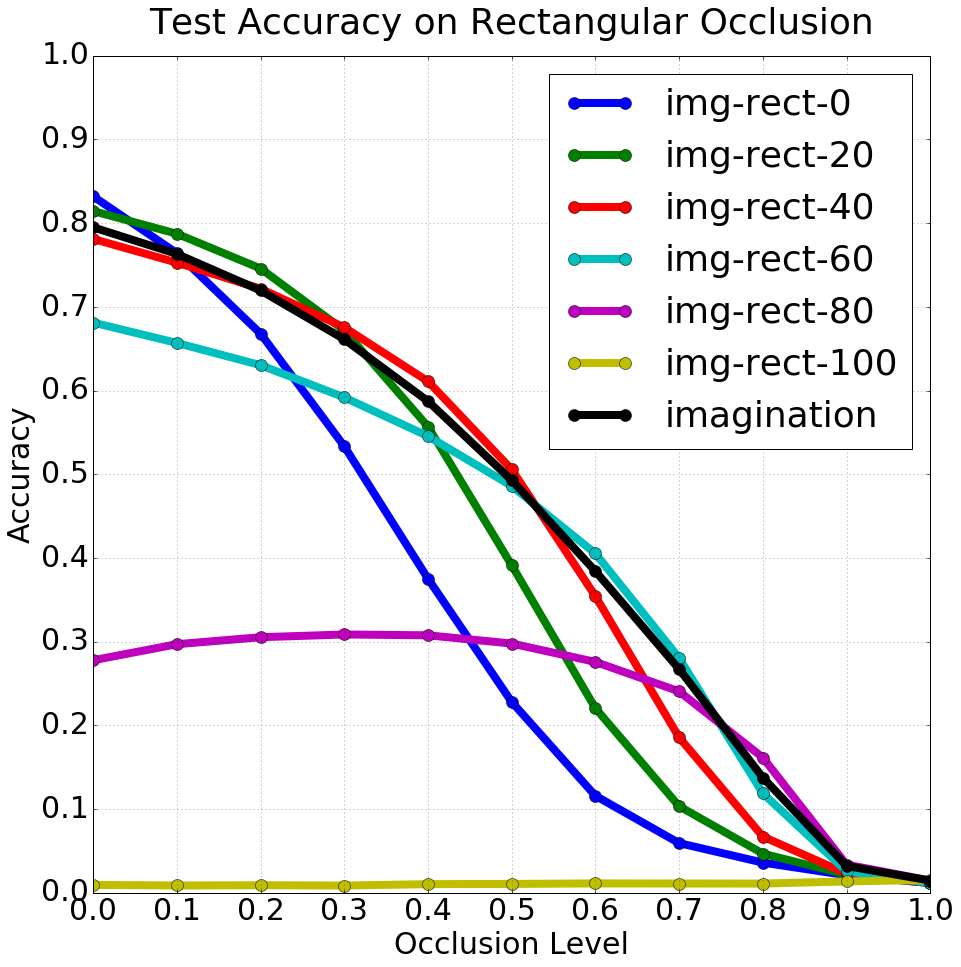

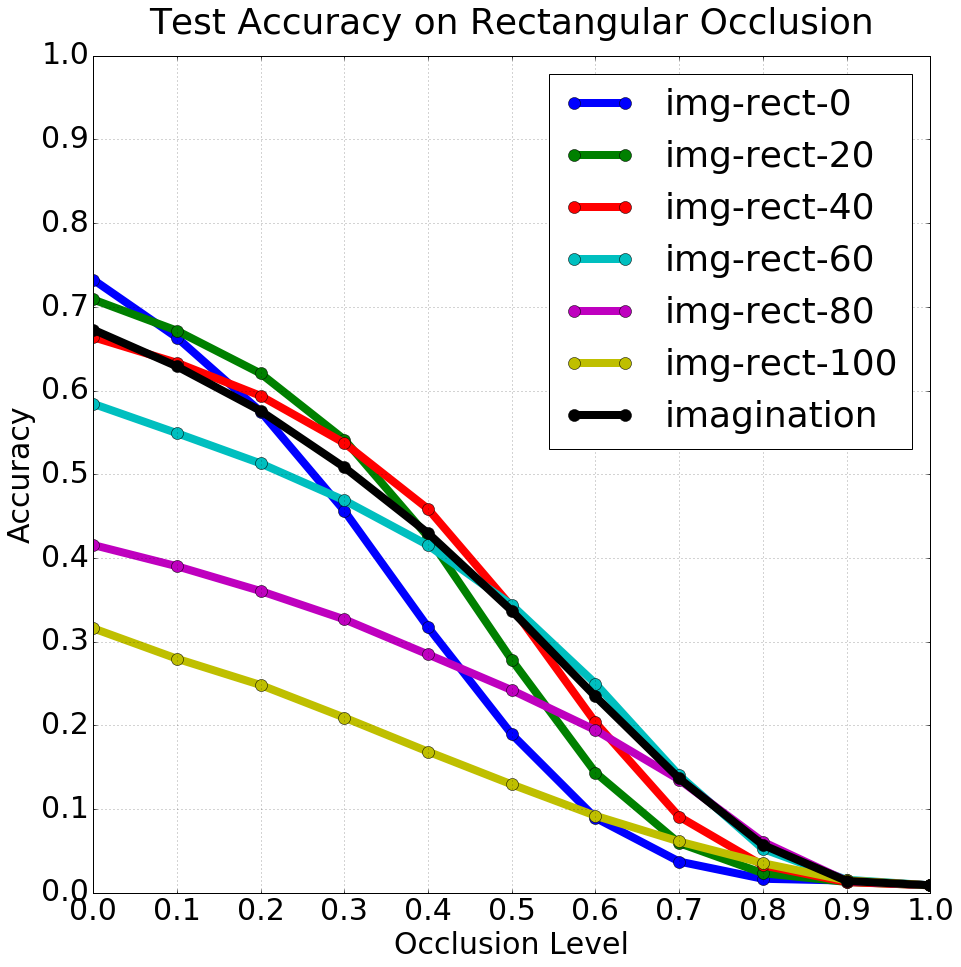

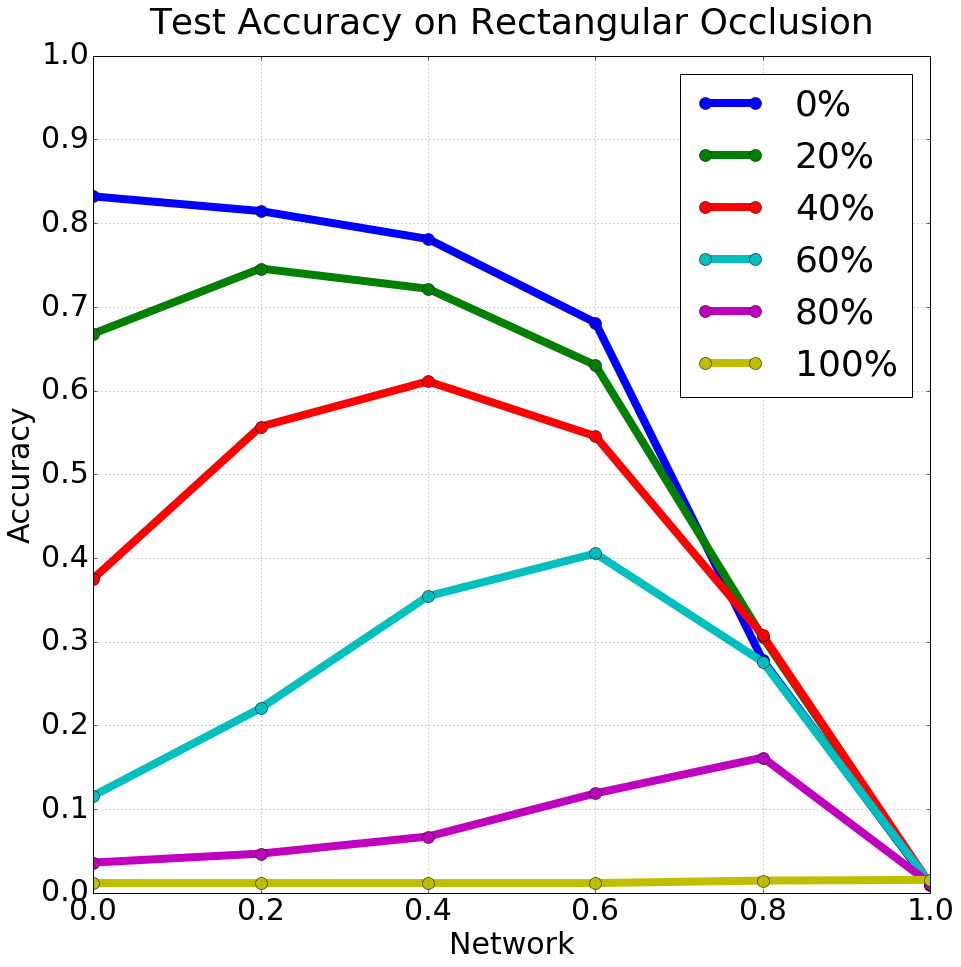

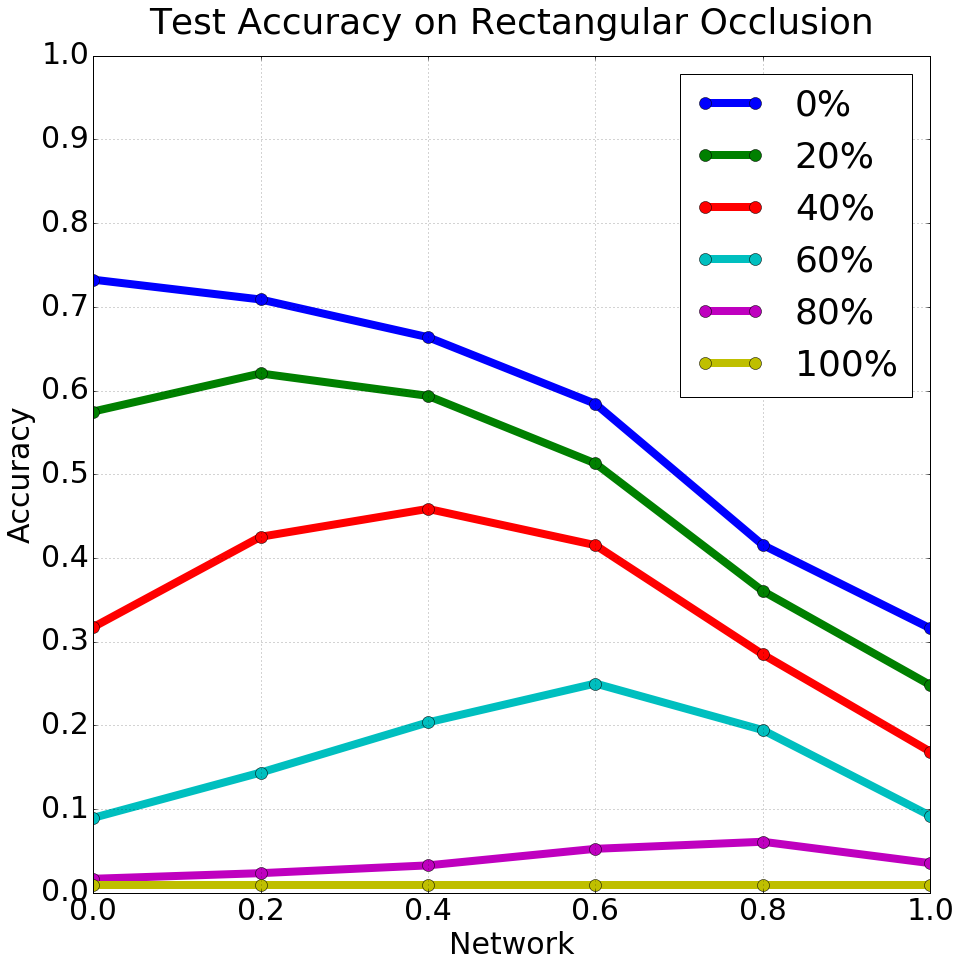

| test_size |0\% & 10\% & 20\% & 30\% & 40\% & 50\% & 60\% & 70\% & 80\% & 90\% & 100\% & 
|-|
| crop_0 | 0.832 & 0.764 & 0.668 & 0.533 & 0.375 & 0.228 & 0.116 & 0.059 & 0.036 & 0.021 & 0.012 & 
| crop_20 | 0.814 & 0.787 & 0.746 & 0.672 & 0.557 & 0.391 & 0.221 & 0.103 & 0.047 & 0.022 & 0.012 & 
| crop_40 | 0.781 & 0.753 & 0.722 & 0.676 & 0.611 & 0.506 & 0.354 & 0.186 & 0.067 & 0.023 & 0.012 & 
| crop_60 | 0.681 & 0.657 & 0.630 & 0.592 & 0.546 & 0.486 & 0.405 & 0.281 & 0.119 & 0.026 & 0.012 & 
| crop_80 | 0.278 & 0.297 & 0.305 & 0.309 & 0.308 & 0.298 & 0.276 & 0.241 & 0.162 & 0.034 & 0.015 & 
| crop_100 | 0.009 & 0.009 & 0.009 & 0.009 & 0.010 & 0.011 & 0.011 & 0.011 & 0.011 & 0.014 & 0.015 & 
| crop_all | 0.795 & 0.763 & 0.720 & 0.661 & 0.587 & 0.493 & 0.384 & 0.267 & 0.138 & 0.032 & 0.015 & 
| nocrop_0 | 0.733 & 0.663 & 0.575 & 0.456 & 0.317 & 0.190 & 0.090 & 0.037 & 0.017 & 0.015 & 0.009 & 
| nocrop_20 | 0.709 & 0.672 & 0.620 & 0.542 & 0.425 & 0.278 & 0.144 & 0.059 & 0.023 & 0.013 & 0

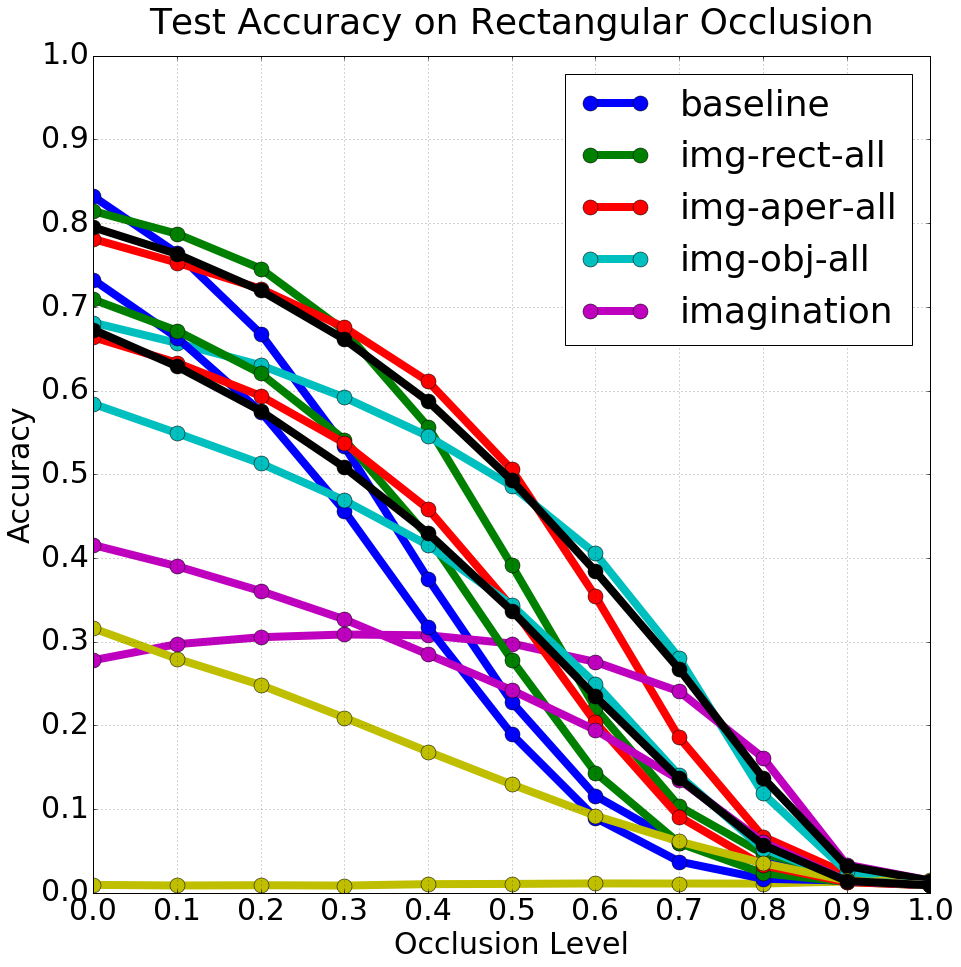

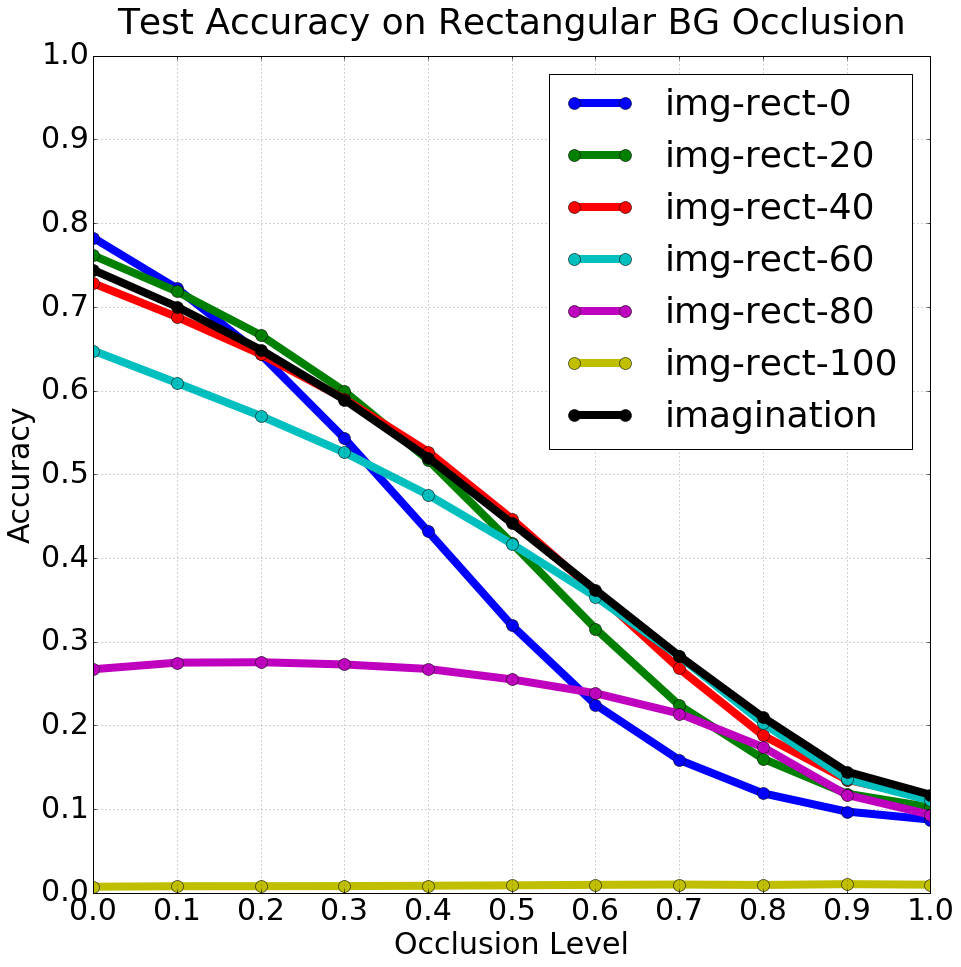

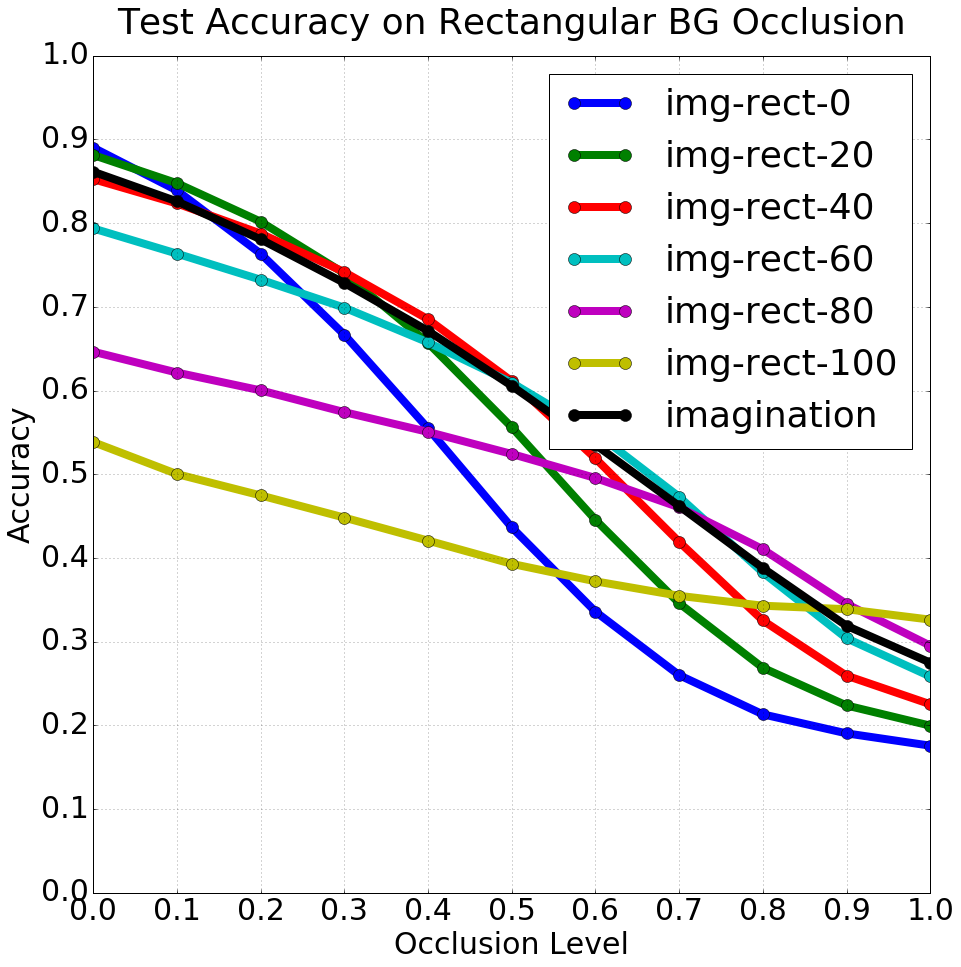

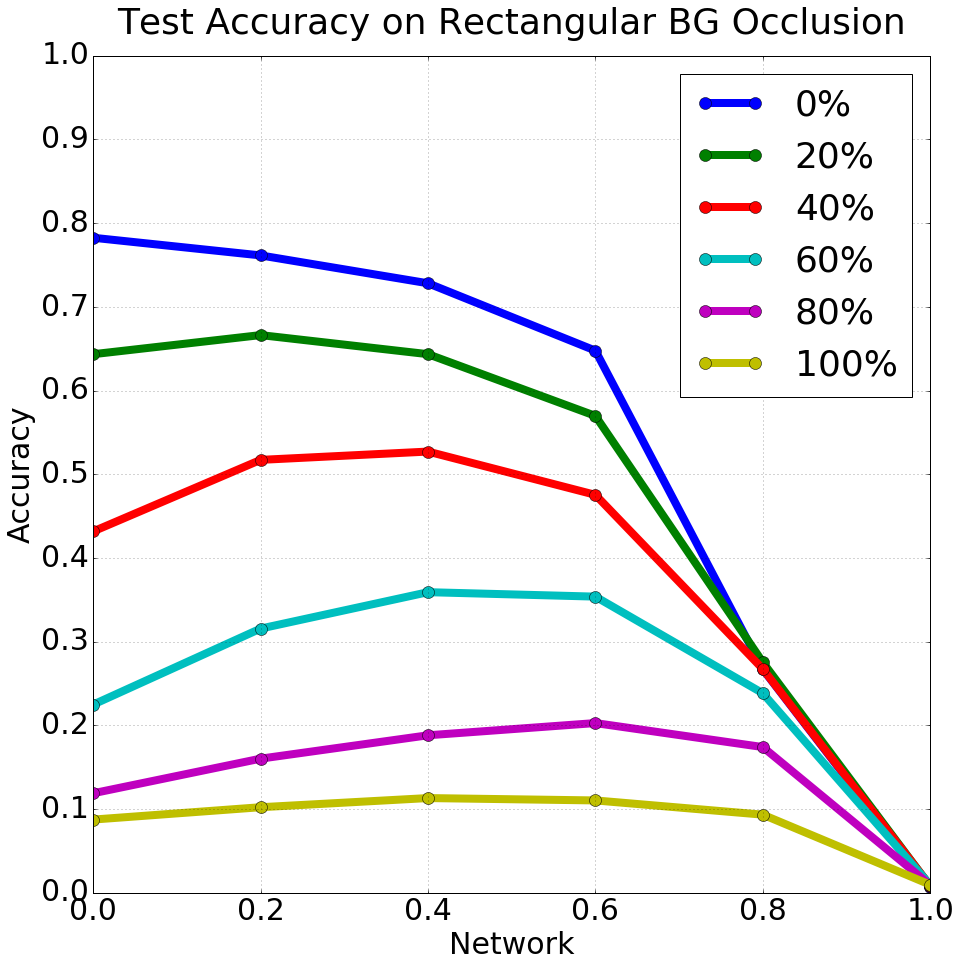

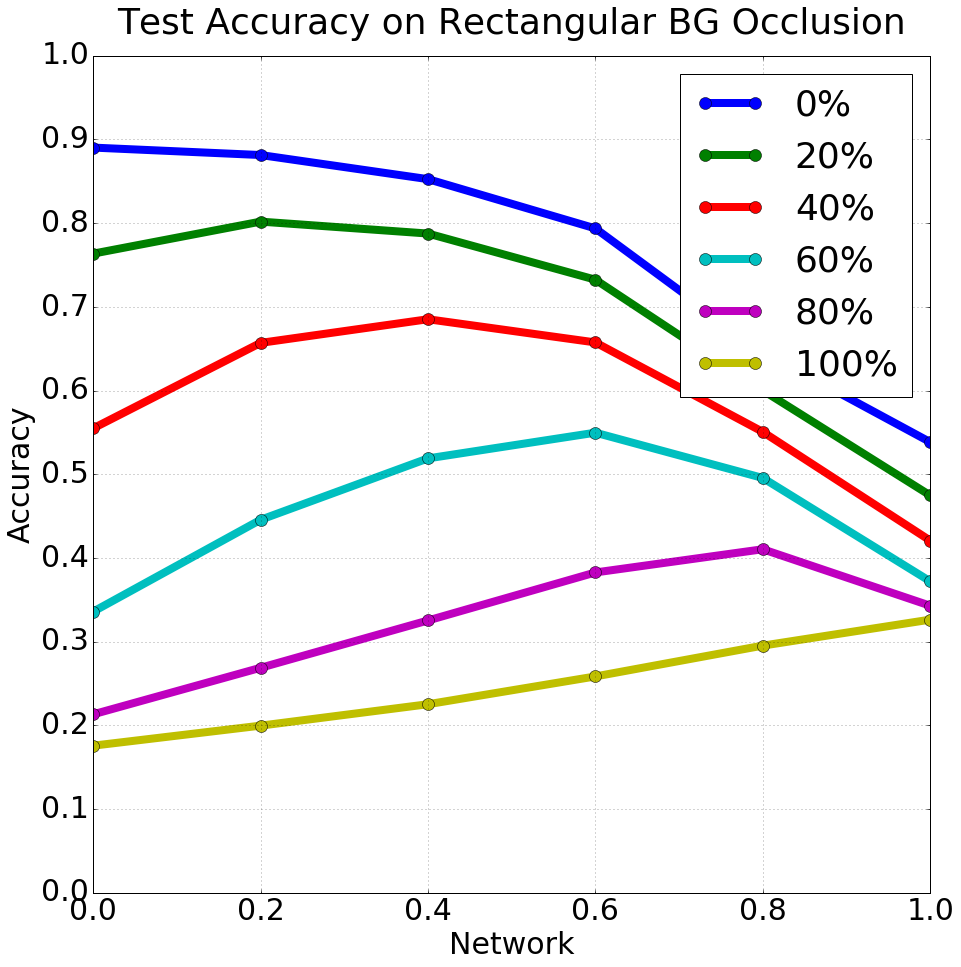

| test_size |0\% & 10\% & 20\% & 30\% & 40\% & 50\% & 60\% & 70\% & 80\% & 90\% & 100\% & 
|-|
| crop_0 | 0.783 & 0.722 & 0.643 & 0.543 & 0.432 & 0.320 & 0.225 & 0.159 & 0.119 & 0.097 & 0.087 & 
| crop_20 | 0.762 & 0.718 & 0.666 & 0.599 & 0.517 & 0.418 & 0.316 & 0.224 & 0.160 & 0.119 & 0.102 & 
| crop_40 | 0.728 & 0.688 & 0.644 & 0.590 & 0.527 & 0.447 & 0.359 & 0.268 & 0.188 & 0.135 & 0.113 & 
| crop_60 | 0.648 & 0.609 & 0.570 & 0.526 & 0.475 & 0.417 & 0.354 & 0.283 & 0.203 & 0.136 & 0.110 & 
| crop_80 | 0.267 & 0.275 & 0.275 & 0.273 & 0.267 & 0.255 & 0.238 & 0.214 & 0.174 & 0.117 & 0.093 & 
| crop_100 | 0.007 & 0.008 & 0.008 & 0.008 & 0.008 & 0.009 & 0.010 & 0.010 & 0.009 & 0.010 & 0.010 & 
| crop_all | 0.744 & 0.700 & 0.649 & 0.589 & 0.520 & 0.442 & 0.362 & 0.283 & 0.210 & 0.145 & 0.117 & 
| nocrop_0 | 0.890 & 0.839 & 0.764 & 0.667 & 0.555 & 0.437 & 0.336 & 0.260 & 0.213 & 0.190 & 0.176 & 
| nocrop_20 | 0.881 & 0.848 & 0.802 & 0.740 & 0.657 & 0.556 & 0.446 & 0.346 & 0.269 & 0.224 & 0

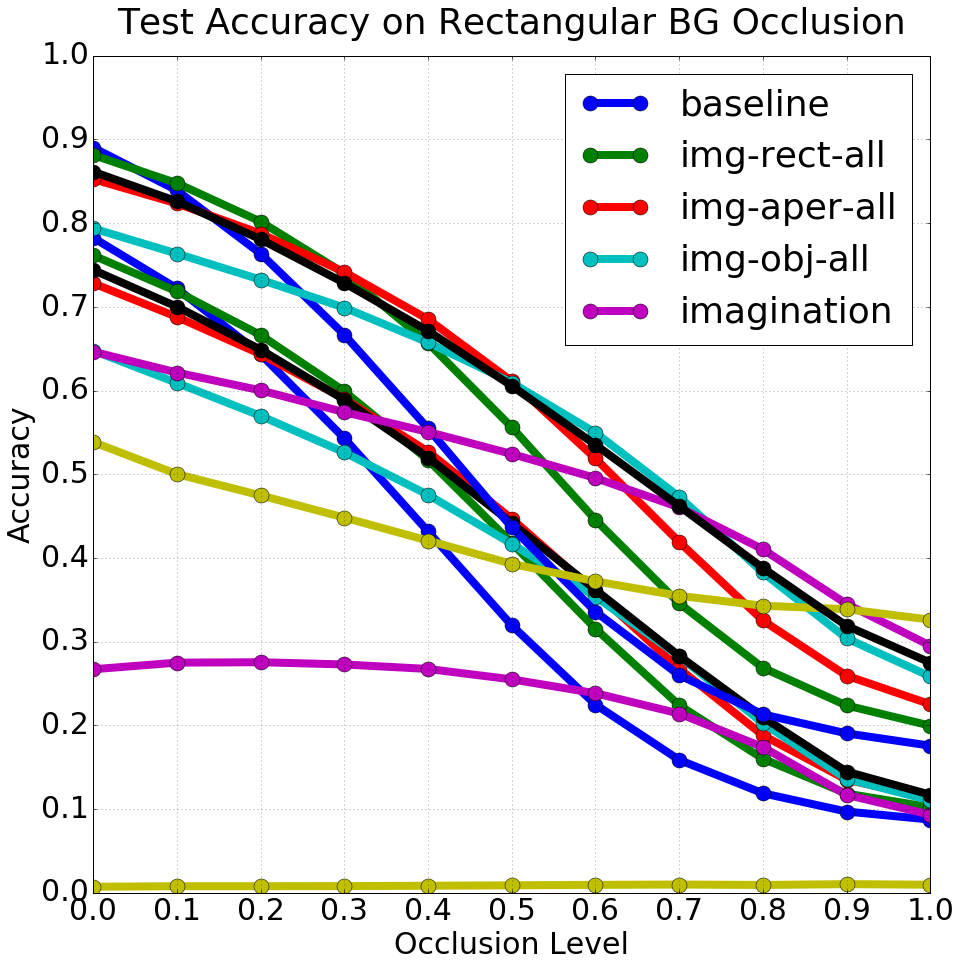

In [57]:
test_size_sq = [i * i for i in test_size]
test_size_sqrt = [math.sqrt(i) for i in test_size]
for test_type_str in test_type_strs:
    if [m[0] for m in models] == sorted(['crop', 'nocrop']):
        # Plot each (model_type_str, test_type_str).
        for model_type_str, model_names in models:
            # Grid.
            fig = plt.figure()
            ax = plt.gca()
            x_range = [0, 1]
            x_unit = 0.1
            y_range = [0, 1]
            y_unit = 0.1
            ax.set_xlim(x_range)
            ax.set_ylim(y_range)
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))                                                       
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                             
            ax.grid(which='both')                                                            
            ax.grid(which='minor', alpha=0.2)                                                
            ax.grid(which='major', alpha=0.5)   
            ax.set_xlabel('Occlusion Level')
            ax.set_ylabel('Accuracy')
            plt.title('Test Accuracy on {} Occlusion'.format(test_type_str_to_name[test_type_str]), y = 1.02)
            legends = []
            for model_name in model_names:
                accuracy = load_accuracy(model_type_str, model_name, test_type_str, test_size)
                plt.plot(test_size, accuracy, marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 12.0)
                #plot_accuracy_divide(model_type_str, model_name, test_type_str, test_size)
                if 'all' in model_name:
                    legends.append('imagination'.format('img_rect', model_name))
                else:
                    legends.append('{}-{}'.format('img-rect', model_name))
            plt.legend(legends, loc='upper right')
            plt.show()
            fig.savefig('{}test/test_curve_{}_{}.png'.format(result_root, model_type_str, test_type_str))
            
        # Plot each (test_type_str, model_type_str).
        for model_type_str, model_names in models:
            # Grid.
            fig = plt.figure()
            ax = plt.gca()
            x_range = [0, 1]
            x_unit = 0.2
            y_range = [0, 1]
            y_unit = 0.1
            ax.set_xlim(x_range)
            ax.set_ylim(y_range)
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))                                                       
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                             
            ax.grid(which='both')                                                            
            ax.grid(which='minor', alpha=0.2)                                                
            ax.grid(which='major', alpha=0.5)   
            ax.set_xlabel('Network')
            ax.set_ylabel('Accuracy')
            plt.title('Test Accuracy on {} Occlusion'.format(test_type_str_to_name[test_type_str]), y = 1.02)
            legends = []
            accuracy_every = np.zeros((len(model_size), len(test_size)))
            for i, size in enumerate(model_size):
                model_name = str(int(size * 100))
                accuracy_every[i] = load_accuracy(model_type_str, model_name, test_type_str, test_size)
            for i, size in enumerate(test_size):
                if int(size * 100) % 20 != 0:
                    continue
                plt.plot(model_size, accuracy_every[:, i], marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 12.0)
                legends.append('{}%'.format(int(size * 100)))
            plt.legend(legends, loc='upper right')
            plt.show()
            fig.savefig('{}test/test_curve_by_testdataset_{}_{}.png'.format(result_root, model_type_str, test_type_str))
    
    # Plot each (test_type_str).
    # Grid.
    fig = plt.figure()
    ax = plt.gca()
    x_range = [0, 1]
    x_unit = 0.1
    y_range = [0, 1]
    y_unit = 0.1
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel('Occlusion Level')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
    ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))    
    ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                             
    ax.grid(which='both')                                                            
    ax.grid(which='minor', alpha=0.2)                                                
    ax.grid(which='major', alpha=0.5)   
    plt.title('Test Accuracy on {} Occlusion'.format(test_type_str_to_name[test_type_str]), y = 1.02)

    # Print table.
    sys.stdout.write('| test_size |')
    for size in test_size:
        sys.stdout.write('{}\\% & '.format(int(size * 100)))
    sys.stdout.write('\n|-|\n')
    legends = []
    for model_type_str, model_names in models:
        for model_name in model_names:
            accuracy = load_accuracy(model_type_str, model_name, test_type_str, test_size)
            plt.plot(test_size, accuracy, marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 15.0)
            #plot_accuracy_divide(model_type_str, model_name, test_type_str, test_size)
            legends.append('{}_{}'.format(model_type_str, model_name))
            # Print table.
            
            sys.stdout.write('| {}_{} | '.format(model_type_str, model_name))
            for x in accuracy:
                sys.stdout.write('{:.3f} & '.format(x))
            sys.stdout.write('\n')
    plt.legend(legend_names, loc='upper right')
    plt.show()
    fig.savefig('{}test/test_curve_{}_{}.png'.format(result_root, [m[0] for m in models], test_type_str))

    # Plot accuracy increase.
    for model_type_str, model_names in models:
        if models[1] == ('every', ['all']):
            accuracy_base = np.array(load_accuracy(model_type_str, model_names[0], test_type_str, test_size))
            #accuracy_all = np.array(load_accuracy(model_type_str, model_names[1], test_type_str, test_size))
            accuracy_all = np.array(load_accuracy('every', 'all', test_type_str, test_size))
            accuracy_increase = accuracy_all - accuracy_base

            sys.stdout.write('| increase | ')
            for x in accuracy_increase:
                sys.stdout.write('{:.3f} & '.format(x))
            sys.stdout.write('\n')

            # Grid.
            ax = plt.gca()
            x_range = [0, 1]
            x_unit = 0.10
            y_range = [-0.1, 0.3]
            y_unit = 0.05
            ax.set_xlim(x_range)
            ax.set_ylim(y_range)
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
            ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))                                                       
            ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                        
            ax.grid(which='both')                                                            
            ax.grid(which='minor', alpha=0.2)                                                
            ax.grid(which='major', alpha=0.5)   
            plt.title('Accuracy Increase Of\nTesting Model {} On Dataset {}'.format(model_type_str, test_type_str), y = 1.02)
            plt.plot(test_size, accuracy_increase, marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 12.0)
            plt.show()
            fig.savefig('{}test/test_curve_{}_{}_increase.png'.format(result_root, model_type_str, test_type_str))
            

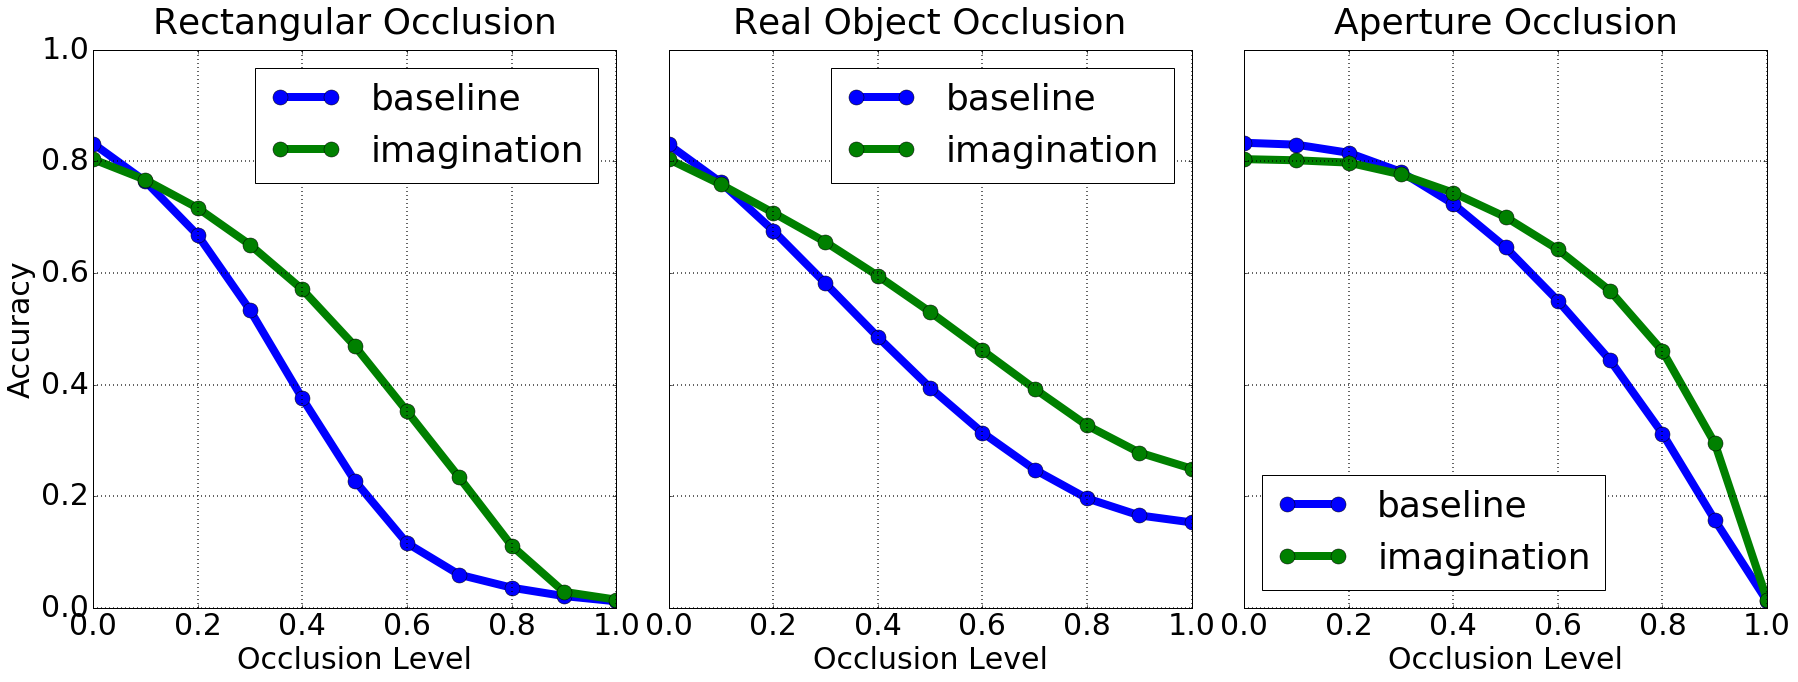

In [39]:
plt.rcParams['figure.figsize'] = (30, 10)
matplotlib.rcParams.update({'font.size': 30})

legend_names = ['baseline', 'imagination']
test_type_str_to_name = {'crop': 'Rectangular', 'aperture': 'Aperture', 'crop_obj': 'Real Object'}

'''
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
'''

ax = [None, None, None]
f, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, sharex=True, sharey=True)
for count in range(3):
    if count == 0:
        models = [('crop', ['0']), ('every', ['all'])]
        test_type_strs = ['crop']
        test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    elif count == 2:
        models = [('aperture', ['100']), ('every', ['all'])]
        test_type_strs = ['aperture']
        test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    else:
        models = [('crop_obj', ['0']), ('every', ['all'])]
        test_type_strs = ['crop_obj']
        test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for test_type_str in test_type_strs:
        for model_type_str, model_names in models:
            for model_name in model_names:
                accuracy = load_accuracy(model_type_str, model_name, test_type_str, test_size)
                ax[count].plot(test_size, accuracy, marker = 'o', linestyle = '-', linewidth = 8.0, markersize = 15.0)
    x_range = [0, 1]
    x_unit = 0.2
    y_range = [0, 1]
    y_unit = 0.2
    ax[count].set_xlim(x_range)
    ax[count].set_xlabel('Occlusion Level')
    ax[count].set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
    ax[count].set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
    #if count != 3:
        #ax[count].set_xticks(ax[count].get_xticks()[:-1])
    if count == 0:
        ax[count].set_ylim(y_range)
        ax[count].set_ylabel('Accuracy')
        ax[count].set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))    
        ax[count].set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                             
    ax[count].grid(which='both')                                                            
    ax[count].grid(which='minor', alpha=0.2, linewidth=2)                                               
    ax[count].grid(which='major', alpha=0.5, linewidth=2)   
    ax[count].set_title('{} Occlusion'.format(test_type_str_to_name[test_type_str]), y = 1.02)
    if count != 2:
        ax[count].legend(legend_names, loc='upper right')
    else:
        ax[count].legend(legend_names, loc='lower left')

f.subplots_adjust(wspace=0.1)